___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [92]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [93]:
# Loadind MNIST dataset from keras datasetes

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [94]:
# Checking the length of X_train and X_test

print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image

X_train[5].shape # 1 channel as it is grey scale

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

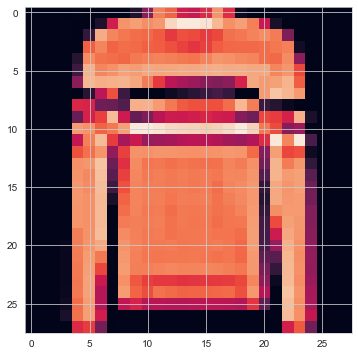

In [6]:
# Plot image for X_train[5]

plt.imshow(X_train[5])

In [7]:
# Checking the y value for X_train[5]

y_train[5]

2

In [8]:
# Checking the shape of y_train

y_train.shape

(60000,)

In [9]:
# Checking the values of y_train

y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
# Checking the unique values of y_train to determine the number of classes

np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [11]:
# Defining class names based on images

classes=["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
# Checking the class number of y_train[0]

y_train[0]

9

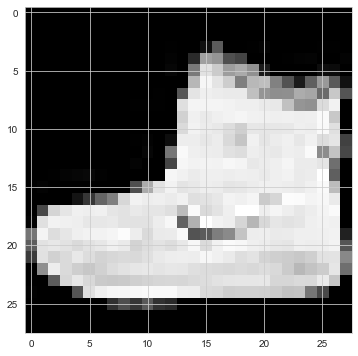

In [13]:
# Plotting the images for y_train[0]

plt.imshow(X_train[0], cmap="Greys_r")

In [14]:
# Checking the classes for y_train[0]

classes[y_train[0]]

'Ankle boot'

In [15]:
# Checking the pixel values of first images for y_train values 1

X_train[y_train == 1][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 146, 127, 115,
        111, 130, 129, 100, 147, 169, 190,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 117, 190, 188, 221,
        234, 254, 236, 221, 205, 186, 222,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 127, 156, 175, 193,
        195, 195, 202, 203, 187, 168, 228,  32,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 186, 198, 209,
        219, 198, 205, 211, 201, 189, 233,  94,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 185, 199, 210, 225,
        207, 201, 207, 221, 210, 208, 236, 111,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 200, 175, 172, 215,
        224, 216, 216, 223, 210, 198, 237, 152,   0,   0,   0,   0,   0,
          0,   0],
       [  

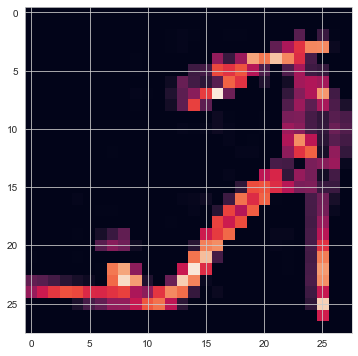

In [16]:
# plot first image for y_train value 5

plt.imshow(X_train[y_train == 5][0])

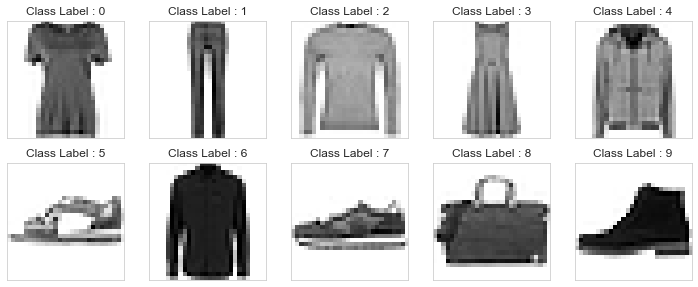

In [17]:
# Plot images of each class in y_train to determine class names

plt.figure(figsize=(10,10))
for i in range(0, 10):
    plt.subplot(5, 5, i+1)  
    plt.imshow(X_train[y_train == i][3], cmap=plt.cm.binary)
    plt.title(f"Class Label : {i}")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()

In [18]:
# As it is seen from the images above we can define classes as follows

classes=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

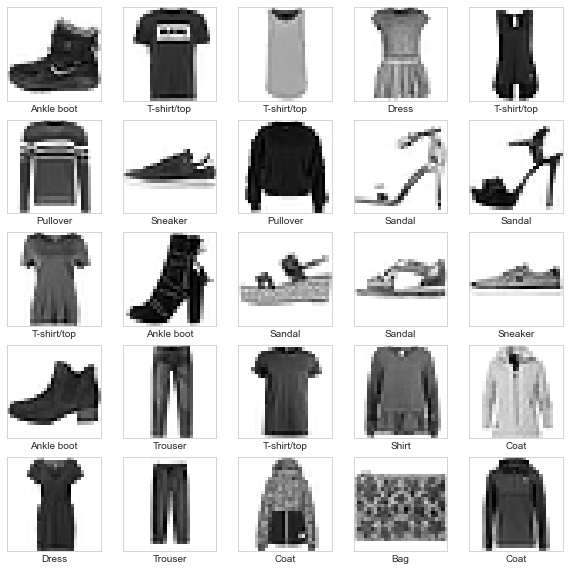

In [19]:
# plot first 25 images from X_train

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i] / 255.0, cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
# Checking the min value of X_train to decide making normalization

X_train[5].min()

0

In [21]:
# Checking the max value of X_train to decide making normalization

X_train[5].max()

255

In [22]:
# Normalizing X_train and X_test values

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
# Checking the min value of X_train after normalization

X_train[5].min()

0.0

In [24]:
# Checking the max value of X_train after normalization

X_train[5].max()

1.0

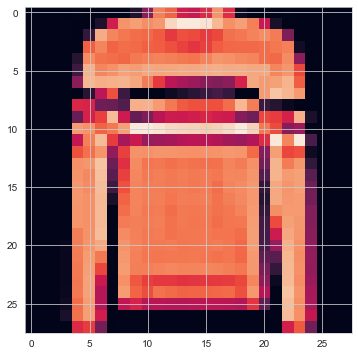

In [25]:
# plot X_train[5] image after normalization

plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [102]:
# Before building model we need to reshape of train and test data because CNN model needs it 

X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [103]:
# Reshaping train and test data

X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [104]:
# as we have multiclass label we should apply one-hot encoding to y_label with tensorflow to_categorical method

from tensorflow.keras.utils import to_categorical

In [105]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [106]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization 

In [107]:
# defining image shape 

img_shape = X_train[0].shape

## MODEL 1

In [33]:
# building CNN model

model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [34]:
# checking the CNN model architecture and count of parameters

parameter model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 28)        16156     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10108)             0

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# defining early stop to prevent overfit

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [37]:
%%time
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 37s 621us/sample - loss: 0.4201 - acc: 0.8477 - val_loss: 0.3215 - val_acc: 0.8841
Epoch 2/50
60000/60000 [==============================] - 37s 609us/sample - loss: 0.2828 - acc: 0.8987 - val_loss: 0.3059 - val_acc: 0.8890
Epoch 3/50
60000/60000 [==============================] - 36s 601us/sample - loss: 0.2565 - acc: 0.9082 - val_loss: 0.2940 - val_acc: 0.8993
Epoch 4/50
60000/60000 [==============================] - 37s 613us/sample - loss: 0.2394 - acc: 0.9164 - val_loss: 0.2531 - val_acc: 0.9096
Epoch 5/50
60000/60000 [==============================] - 36s 601us/sample - loss: 0.2307 - acc: 0.9204 - val_loss: 0.2775 - val_acc: 0.9066
Epoch 6/50
60000/60000 [==============================] - 36s 600us/sample - loss: 0.2306 - acc: 0.9218 - val_loss: 0.2812 - val_acc: 0.9073
Epoch 7/50
60000/60000 [==============================] - 36s 607us/sample - loss: 0.2275 - acc: 0.9226 

In [39]:
# save model permanently and check

model.save('fashion_mnist1.h5')

In [40]:
# checking model metric_names

model.metrics_names

['loss', 'acc']

In [41]:
# Checking the last 5 model metrics values

summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,acc,val_loss,val_acc
9,0.242,0.923,0.300,0.905
10,0.242,0.922,0.322,0.896
11,0.250,0.920,0.425,0.894
12,0.255,0.920,0.364,0.900
13,0.264,0.918,0.427,0.864


**TASK 7: Plot values of metrics you used in your model.**

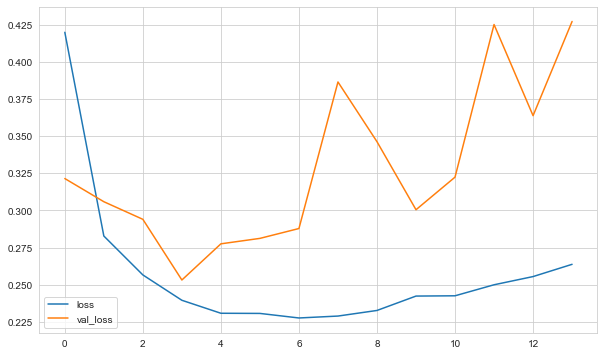

In [42]:
# potting loss and val_loss values

summary[["loss", "val_loss"]].plot();

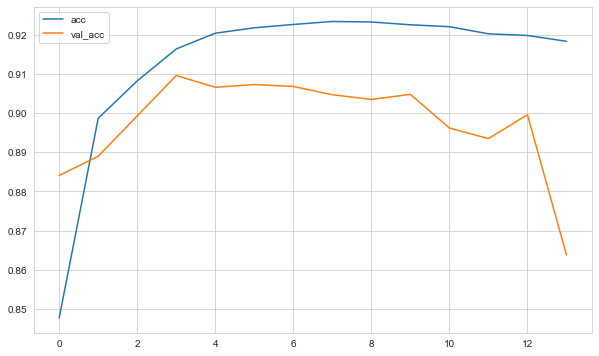

In [44]:
# potting accuracy(acc) and val_accuracy(val_acc) values

summary[["acc", "val_acc"]].plot();

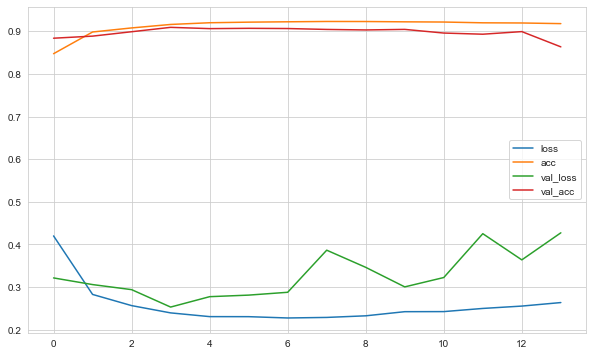

In [45]:
# plotting all scoring metrics of first model

summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# evaluate the model performance with test data using model.evaluate method

the model.evaluate(X_test, Y_test) 

10000/10000 [==============================] - 2s 176us/sample - loss: 0.2531 - acc: 0.9096


[0.2531092789053917, 0.9096]

In [48]:
# print the loss and accuracy values of test data

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])     # 0.8986572027206421
print('Test accuracy:', score[1]) # 0.6941999793052673

Test loss: 0.2531092789053917
Test accuracy: 0.9096


## Prediction

In [49]:
# prediction using test data

pred_prob = model.predict(X_test)

In [50]:
# getting the indexes of max values in predictions

y_pred = np.argmax(pred_prob, axis=1)

In [51]:
y_pred 

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [52]:
# checking precision, recall and f1_score values with classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.89      0.86      1000
           3       0.88      0.94      0.91      1000
           4       0.86      0.86      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.68      0.73      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## MODEL 2

In [100]:
from tensorflow.keras.layers import BatchNormalization

In [108]:
# build a second model

model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=img_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [109]:
# checking the second CNN model architecture and count of parameters

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 28)        112       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 28)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 23, 23, 64)        16192     
_________________________________________________________________
batch_normalization_4 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 28)       

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [110]:
# defining early stop to prevent overfitting

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [111]:
%%time
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 42s 700us/sample - loss: 0.7074 - acc: 0.7881 - val_loss: 0.4719 - val_acc: 0.8418
Epoch 2/50
60000/60000 [==============================] - 43s 711us/sample - loss: 0.4731 - acc: 0.8570 - val_loss: 0.4459 - val_acc: 0.8411
Epoch 3/50
60000/60000 [==============================] - 43s 719us/sample - loss: 0.4366 - acc: 0.8653 - val_loss: 0.4670 - val_acc: 0.8533
Epoch 4/50
60000/60000 [==============================] - 44s 725us/sample - loss: 0.4165 - acc: 0.8713 - val_loss: 0.3308 - val_acc: 0.8884
Epoch 5/50
60000/60000 [==============================] - 45s 743us/sample - loss: 0.3935 - acc: 0.8765 - val_loss: 0.3304 - val_acc: 0.8832
Epoch 6/50
60000/60000 [==============================] - 45s 749us/sample - loss: 0.3644 - acc: 0.8836 - val_loss: 0.3392 - val_acc: 0.8938
Epoch 7/50
60000/60000 [==============================] - 51s 844us/sample - loss: 0.3501 - acc: 0.8892 

In [112]:
# save model permanently and check

model.save('fashion_mnist2.h5')

In [113]:
model.metrics_names

['loss', 'acc']

In [116]:
# Checking the last 10 model metrics values

summary = pd.DataFrame(model.history.history)
summary.tail(10)

,loss,acc,val_loss,val_acc
7,0.335,0.893,0.342,0.890
8,0.322,0.898,0.323,0.896
9,0.316,0.899,0.324,0.897
10,0.310,0.903,0.371,0.906
11,0.323,0.901,0.354,0.894
12,0.323,0.901,0.313,0.906
13,0.328,0.903,0.330,0.896
14,0.328,0.902,0.348,0.902
15,0.327,0.902,0.458,0.864
16,0.323,0.903,0.374,0.896


**TASK 7: Plot values of metrics you used in your model.**

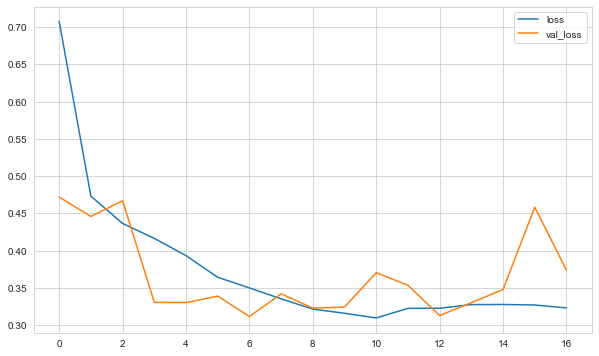

In [117]:
# plotting loss and val_loss values of model 2

summary[["loss", "val_loss"]].plot();

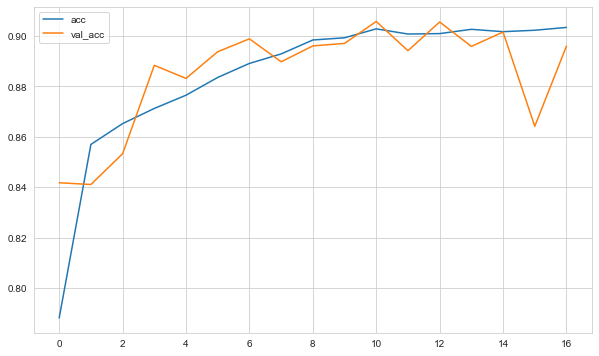

In [118]:
# plotting accuracy and val_accuracy values of model 2

summary[["acc", "val_acc"]].plot();

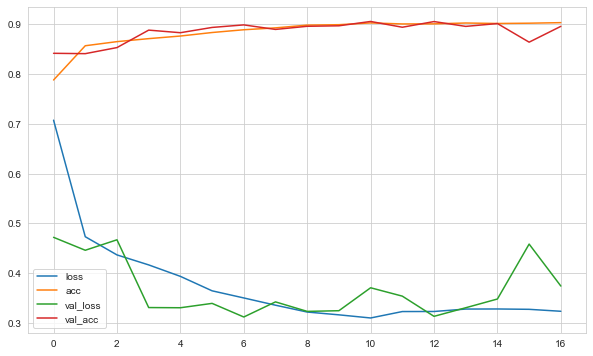

In [119]:
# plotting all scoring metrics of model 2

summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
# evaluate the model performance with test data using model.evaluate method

model.evaluate(X_test, Y_test) 

10000/10000 [==============================] - 2s 193us/sample - loss: 0.3118 - acc: 0.8989


[0.311786820936203, 0.89890003]

In [122]:
# print the loss and accuracy values of test data

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])     # 0.8986572027206421
print('Test accuracy:', score[1]) # 0.6941999793052673

Test loss: 0.311786820936203
Test accuracy: 0.89890003


In [123]:
# prediction using test data

pred_prob = model.predict(X_test)

In [124]:
# getting the indexes of max values in predictions

y_pred = np.argmax(pred_prob, axis=1)

In [125]:
y_pred 

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.90      0.85      1000
           3       0.84      0.94      0.89      1000
           4       0.87      0.82      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.83      0.57      0.68      1000
           7       0.93      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



<AxesSubplot:>

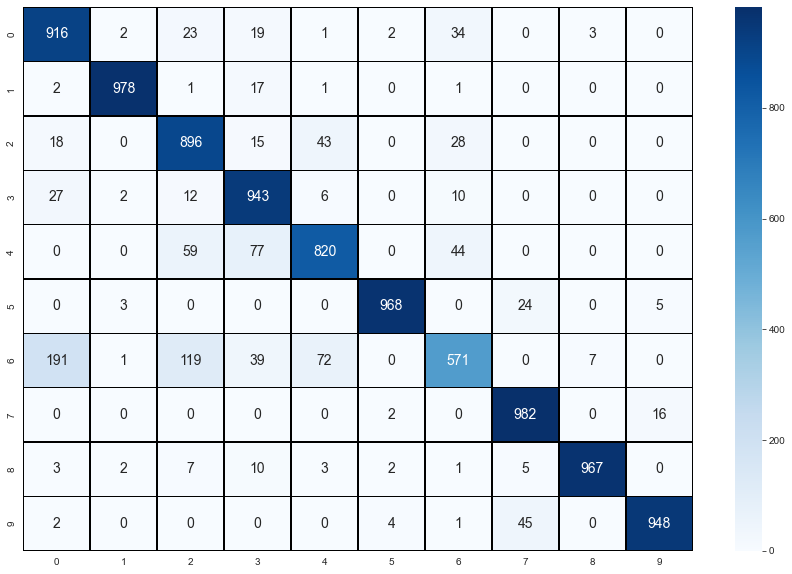

In [127]:
# plotting confusion matrix with heatmap

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [128]:
# define an image to use in prediction

my_image = X_test[50]

In [129]:
# checking the shape of image which will be used in prediction

my_image.shape

(28, 28, 1)

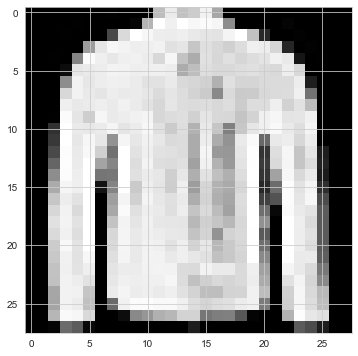

In [130]:
# plotting the image whic will be predict

plt.imshow(my_image, cmap="Greys_r")

In [131]:
# prediction with the image in test data

image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [132]:
# to show the prediction result

image_prediction

array([[1.3012250e-03, 7.4744985e-06, 1.2565482e-01, 6.7652337e-04,
        6.6049600e-01, 1.1409702e-06, 2.1173844e-01, 3.3259839e-06,
        1.1897332e-04, 2.1539893e-06]], dtype=float32)

In [133]:
# taking the max. index values of predictions

np.argmax(image_prediction, axis=1)

array([4], dtype=int64)

In [134]:
# prediction result of the image we select above

result=np.argmax(image_prediction, axis=1)

In [135]:
result

array([4], dtype=int64)

In [136]:
# finding the class of the prediction

classes[int(result)]

'Coat'

In [145]:
# finding the total number of mis-predictions

y_test != y_pred

array([False, False, False, ..., False, False, False])

In [148]:
# finding the total number of mis-predictions

(y_test != y_pred).sum()

1011

In [149]:
# finding the proportion of mis-predictions in total test data

(y_test != y_pred).sum()/len(y_test)

0.1011

## finished

In [137]:
import tensorflow as tf

In [138]:
# We have already saved the second model above. So we can load it with tensorflow load_model method to make prediction.

model=tf.keras.models.load_model('fashion_mnist2.h5')

In [139]:
# checking the size of image which will be used in predictions

X_test[88].shape

(28, 28, 1)

In [140]:
# expanding the image shape

np.expand_dims(X_test[88],axis=0).shape

(1, 28, 28, 1)

In [141]:
# making predictions

pred=model.predict(np.expand_dims(X_test[88],axis=0))

In [142]:
# getting the max index value of prediction as a class number

np.argmax(pred)

0

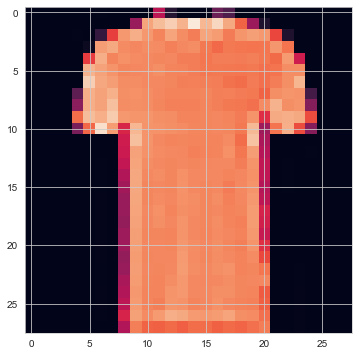

In [143]:
plt.imshow(X_test[88])

In [144]:
# getting the class name of the prediction

classes[np.argmax(pred)]

'T-shirt/top'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___